In [3]:
from experiment import evaluate_algorithm
from algorithms import (
    E00PerfectAlgorithm,
    E01SimpleAlgorithm,
    E02SimpleAlgorithmRecallingMean,
    E03ShiftedStories,
    E04LossFN,
    E05LossFNShifted,
    E06LinearRegression,
)

# E00PerfectAlgorithm
This algorithm just uses the real length and the real sizes to prove that achieving perfect score is possible. It fails two sprints likely because of the sprints whose first story contains more points than the length of the sprint itself.

Total regret: 0; Nailed Sprints 5000; Sprints overshoot 0


count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: point_distance, dtype: float64

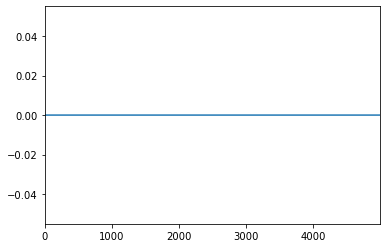

In [4]:
ev = evaluate_algorithm(E00PerfectAlgorithm, no_20=True)
ev.describe()

# E01SimpleAlgorithm
The algorithm that just assumes that every person does 1 point per day and does not care about real lengths or sizes.

Total regret: 141233; Nailed Sprints 23; Sprints overshoot 4936


count    5000.000000
mean      -17.259400
std         8.782889
min       -51.000000
25%       -23.000000
50%       -17.000000
75%       -11.000000
max         7.000000
Name: point_distance, dtype: float64

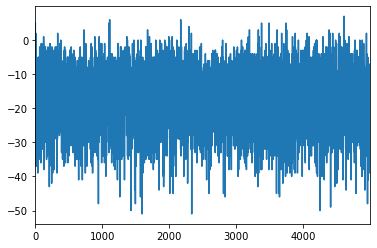

In [5]:
ev = evaluate_algorithm(E01SimpleAlgorithm, no_20=True)
ev.describe()

# E02SimpleAlgorithmRecallingMean

Total regret: 121022; Nailed Sprints 33; Sprints overshoot 4906


count    5000.000000
mean      -15.767800
std         8.537943
min       -53.000000
25%       -21.000000
50%       -15.000000
75%        -9.000000
max         9.000000
Name: point_distance, dtype: float64

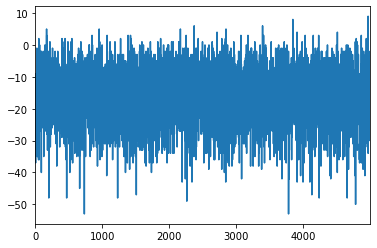

In [6]:
ev = evaluate_algorithm(E02SimpleAlgorithmRecallingMean, no_20=True)
ev.describe()

# E03ShiftedStories
Shifted stories approach shifts up the estimated sizes of the stories proportionally to their size and then estimates the length of the sprint in a similar way to that of `E02SimpleAlgorithmRecallingMean`

Total regret: 24528; Nailed Sprints 244; Sprints overshoot 3339


count    5000.000000
mean       -3.923200
std         7.323744
min       -33.000000
25%        -9.000000
50%        -3.000000
75%         1.000000
max        24.000000
Name: point_distance, dtype: float64

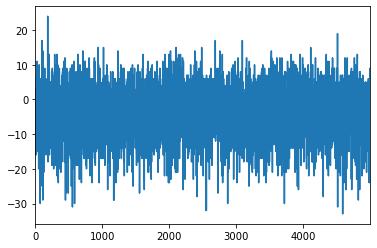

In [7]:
ev = evaluate_algorithm(E03ShiftedStories, no_20=True)
ev.describe()

# E04LossFn
This algorithm exploits the fact that the evaluator will use a regret matrix to estimate our penalisation and replicates such matrix in the decision. To minimise the regret it accepts a `regret_factor` that allows us to make the regret function more or less dramatic.

**Loss function approach with memory learning regret:**
Given that we allow a regret factor it would be great to learn its value for each sprint. To do so we come up with a bayesian estimation between what we chose in the past and what we should have chosen (the factor that would have returned exactly the length). However, this didn't work very well, 69k regret and 102 nailed sprints, mainly because of two reasons:
- We weren't including in our computations the uncertainty of the stories.
- The `estimate_length` method was unable to reach the real points in the sprint

Total regret: 15904; Nailed Sprints 230; Sprints overshoot 1722


count    5000.000000
mean        2.029600
std         8.163189
min       -41.000000
25%        -3.000000
50%         3.000000
75%         8.000000
max        27.000000
Name: point_distance, dtype: float64

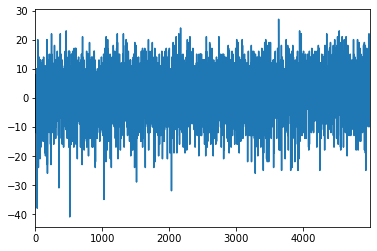

In [8]:
ev = evaluate_algorithm(E04LossFN, no_20=True, regret_factor=8.5)
ev.describe()

Total regret: 20090; Nailed Sprints 278; Sprints overshoot 2694


count    5000.00000
mean       -1.96640
std         7.54593
min       -36.00000
25%        -6.00000
50%        -1.00000
75%         3.00000
max        20.00000
Name: point_distance, dtype: float64

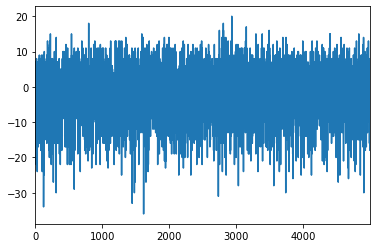

In [9]:
ev = evaluate_algorithm(E04LossFN, no_20=True, regret_factor=8)
ev.describe()

# E05LossFnShifted
Shifted stories worked rather well and also the loss function so in this algorithm we will mix both to reduce a bit more the regret.

Total regret: 13031; Nailed Sprints 272; Sprints overshoot 2145


count    5000.00000
mean        0.22500
std         6.85199
min       -35.00000
25%        -4.00000
50%         1.00000
75%         5.00000
max        22.00000
Name: point_distance, dtype: float64

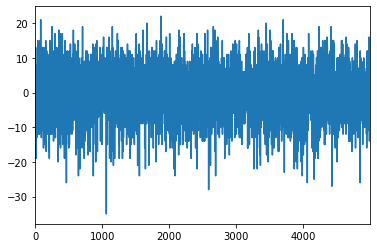

In [10]:
ev = evaluate_algorithm(E05LossFNShifted, no_20=True, regret_factor=2.5)
ev.describe()

Total regret: 10754; Nailed Sprints 253; Sprints overshoot 1357


count    5000.000000
mean        3.116000
std         6.711807
min       -25.000000
25%        -1.000000
50%         3.000000
75%         8.000000
max        28.000000
Name: point_distance, dtype: float64

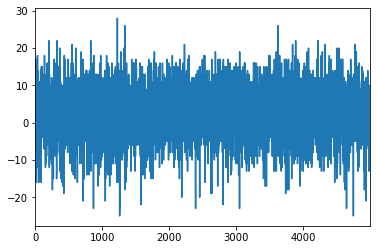

In [12]:
ev = evaluate_algorithm(E05LossFNShifted, no_20=True, regret_factor=4.5)
ev.describe()

# E06LinearRegression
This algorithm is based in the assumption that we can compute a linear model on previous sprints to come up with a slope and an intercept to shift both sprints' estimated length and stories' estimated sizes

Total regret: 9696; Nailed Sprints 185; Sprints overshoot 572


count    5000.000000
mean        6.193000
std         5.662205
min       -40.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        30.000000
Name: point_distance, dtype: float64

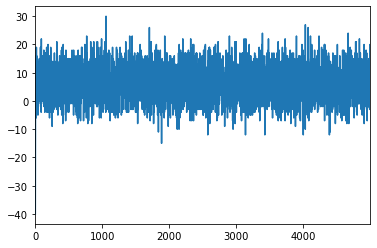

In [1]:
ev = evaluate_algorithm(E06LinearRegression, no_20=True)
ev.describe()